The goal of this notebook is to test an algorithm that may be implemented in the **registration** notebook. 

The principle is to compare two profiles in order to find the offset required in order to minimize the difference between the two profiles

key points:
 * use absolute value when doing the difference
 * narrow down the range of motion of the second profile over the "reference" one, something like 10 or 20 pixels for example

# import 

In [24]:
import numpy as np
import pandas as pd
import os

import scipy

import matplotlib.pyplot as plt
%matplotlib notebook


# load profile 

In [6]:
filename = "data/IPTS-30750_profile_all_files.txt"
assert os.path.exists(filename)

In [8]:
pd_data = pd.read_csv(filename, skiprows=546)

In [9]:
pd_data

,##x_axis,# col.1,# col.2,# col.3,# col.4,# col.5,# col.6,# col.7,# col.8,# col.9,...,# col.530,# col.531,# col.532,# col.533,# col.534,# col.535,# col.536,# col.537,# col.538,# col.539
0,1148,0.748464,0.667559,0.665056,0.671234,0.693420,0.698747,0.705649,0.695784,0.699099,...,0.701700,0.723432,0.731961,0.706386,0.695772,0.686926,0.692898,0.675669,0.719064,0.725663
1,1149,0.734890,0.683577,0.659499,0.670013,0.697148,0.686447,0.696810,0.685347,0.684999,...,0.697280,0.712787,0.719797,0.794615,0.698692,0.698434,0.699806,0.674684,0.719497,0.706000
2,1150,0.742089,0.710211,0.668378,0.682562,0.695405,0.706739,0.678093,0.691753,0.685488,...,0.709463,0.717019,0.702956,0.693535,0.705122,0.717524,0.721384,0.685128,0.728402,0.728580
3,1151,0.744624,0.713616,0.684514,0.691433,0.714353,0.711212,0.683713,0.693442,0.697718,...,0.731859,0.723229,0.720476,0.695668,0.724516,0.713290,0.729293,0.706703,0.731261,0.745039
4,1152,0.730544,0.711413,0.675498,0.684604,0.719831,0.692155,0.674794,0.697568,0.694859,...,0.736017,0.725336,0.713308,0.689723,0.721424,0.706982,0.716994,0.692312,0.719043,0.735407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1495,0.990411,0.960197,0.969473,0.991694,0.997745,0.993551,0.995417,0.977409,0.975659,...,0.979969,0.965078,0.991871,1.014813,1.007042,1.003184,0.977338,1.008560,0.997662,1.038763
348,1496,0.992129,0.960753,0.982552,0.991893,0.994668,1.001983,0.997564,0.970671,0.982218,...,0.969561,0.970167,0.999931,1.015114,1.000543,0.998018,0.948470,1.001229,0.997134,1.040525
349,1497,0.989173,0.957503,0.992475,0.992085,0.990723,0.987367,0.981449,0.967270,0.995510,...,0.984443,0.985368,0.990384,1.013470,0.988195,1.011539,0.943583,0.978608,1.000573,1.030051
350,1498,0.988904,0.970131,0.985541,1.002609,0.979809,0.988349,0.975564,0.958532,0.986712,...,0.990769,0.987157,0.990373,1.018779,0.984795,0.998186,0.943431,0.989563,1.001880,1.007122


In [16]:
x_axis = np.asarray(pd_data['##x_axis'])
profiles = {}
for _index in np.arange(1, 535):
    profiles[_index] = np.asarray(pd_data[f"# col.{_index}"])

In [22]:
rolling_offset = 20

In [19]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

def calculate_pixel_offset(profile_reference=None, working_profile=None, max_pixel_range=20):
    list_profiles = []
    for _offset in np.arange(-max_pixel_range, max_pixel_range):
        list_profiles.append(np.roll(working_profile, _offset))
        
    list_sum_abs_diff = []
    for _profile in list_profiles:
        list_sum_abs_diff.append(sum_abs_diff(_profile, profile_reference))
        
    min_value = np.min(list_sum_abs_diff)
    min_index = np.where(min_value == list_sum_abs_diff)[0][0]
        
    offset_found = max_pixel_range - min_index
        
    return offset_found

In [20]:
reference_profile = profiles[1]

list_offset = []
for _key in profiles.keys():
    _offset = calculate_pixel_offset(profile_reference=reference_profile,
                                    working_profile=profiles[_key])
    list_offset.append(_offset)

<IPython.core.display.Javascript object>


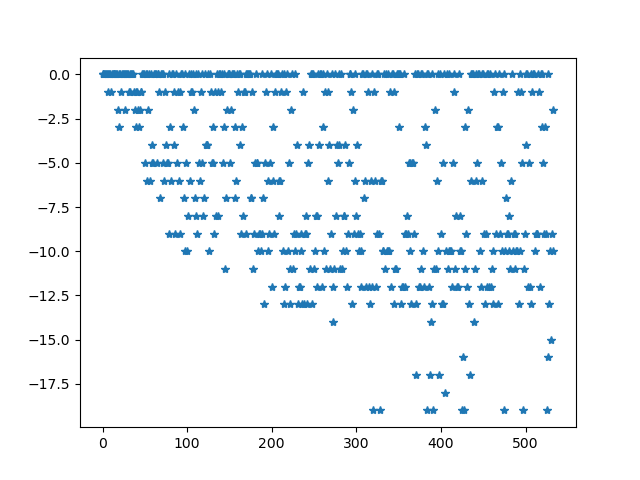

In [22]:
fig, ax = plt.subplots(num=f"all offset")
ax.plot(list_offset, '*')


# adding median 

In [ ]:
median_test = scipy.signal.medfilt(_test, kernel_size=3)

In [26]:
reference_profile_median = scipy.signal.medfilt(profiles[1], kernel_size=3)

list_offset_median = []
for _key in profiles.keys():
    _offset = calculate_pixel_offset(profile_reference=reference_profile,
                                    working_profile=scipy.signal.medfilt(profiles[_key], kernel_size=3))
    list_offset_median.append(_offset)

<IPython.core.display.Javascript object>


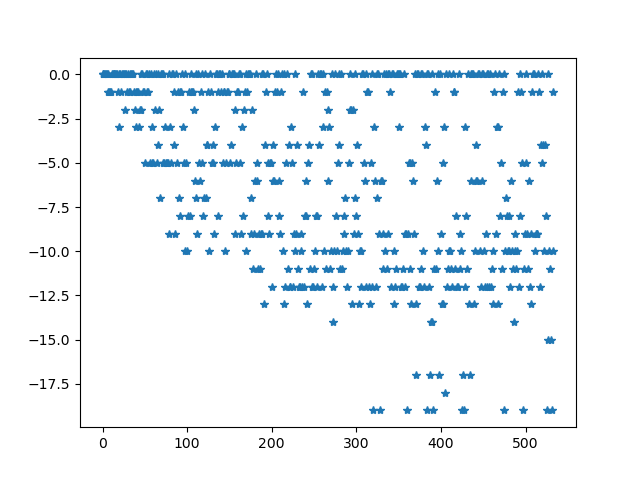

In [27]:
fig, ax = plt.subplots(num=f"all offset with median")
ax.plot(list_offset_median, '*')
